In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

np.random.seed(2023)

# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


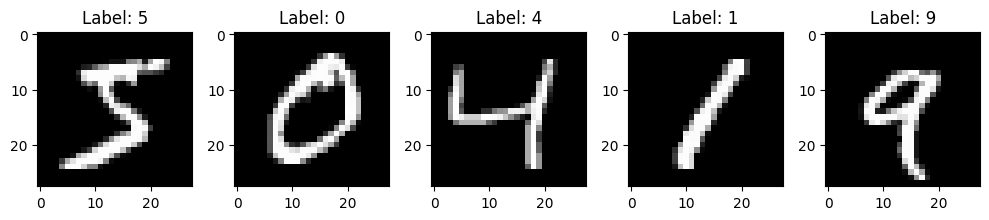

In [2]:
# Plotting the first 5 images from the training set
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
plt.tight_layout()
plt.show()

In [3]:
# Flattening the input images and normalize pixel values
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Converting the labels to categorical variables
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
# Defining the models to be trained
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC())
]

# Training and evaluate the models
for name, model in models:
    print(f'Training {name}...')
    model.fit(x_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(x_test)
    acc = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    print(f'{name} accuracy: {acc}')
    print(f'{name} confusion matrix:\n{cm}\n')

Training Random Forest...
Random Forest accuracy: 0.969
Random Forest confusion matrix:
[[ 971    0    0    0    0    1    3    1    4    0]
 [   0 1122    2    3    1    2    3    1    1    0]
 [   6    0  999    5    3    0    3   10    6    0]
 [   1    0   11  971    0    7    0    9    7    4]
 [   1    0    1    0  954    0    6    0    2   18]
 [   3    0    1   14    5  856    4    2    4    3]
 [   7    3    0    0    4    2  938    0    4    0]
 [   1    3   19    1    1    0    0  989    2   12]
 [   4    0    4    5    6    5    3    4  935    8]
 [  10    5    2   11   11    5    1    4    5  955]]

Training SVM...
SVM accuracy: 0.9792
SVM confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [ 

SVM model has given the highest accuracy above 96%.